### Luis Eduardo Jiménez del Muro - Examen - 18/09/2023

# Examen A Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (37 puntos)

**Costo mínimo**. Imagine dos contenedores cilíndricos sin tapa que deben satisfacer las siguientes condiciones:

- El primer contenedor tiene el doble de altura que el segundo.
- La altura del primer contenedor (el de mayor tamaño) es el doble de su radio.
- El material para la base cuesta 10.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


1. Escriba el volumen $V_1(r_1)$ y $V_2(r_2, r_1)$ de ambos contenedores como dos funciones distintas, donde $r_1$ es el radio del primer contenedor y $r_2$ es el radio del segundo. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

Si la altura del primero es el doble de la altura del segundo, y al mismo tiempo es el doble de su radio, por lo tanto, el radio del primero es igual a la altura del segundo.

$$V_1(r_1) = \pi r_1^2 (2r_1) = 2 \pi r_1^3$$

$$V_2(r_1, r_2) = \pi r_2^2 r_1 $$

2. Escriba el costo **C** de fabricar ambos contenedores como una función de los radios de las bases. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

$$ C_1 = 10 \pi r_1^2 + 6 ( 2 \pi r_1 (2r_1)) = 10 \pi r_1^2 + 24 \pi r_1^2$$


$$ C_2 = 10 \pi r_2^2 + 6 ( 2\pi r_2 r_1 ) = 12 \pi r_1 r_2 $$

$$ C_T = 10\pi r_1^2 + 10\pi r_2^2 + 24\pi r_1^2 + 12\pi r_1 r_2$$

3. Determina las dimensiones de los contenedores si el volumen del contenedor pequeño debe ser de $12m^3$ y el costo debe ser mínimo.

Despejando $r_1$ de $V_2$:

In [36]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sp.var("x")
sp.var("y")

v2 = sp.pi * y**2 * x - 12

xdesp = sp.solve(v2, x)[0]
xdesp




12/(pi*y**2)

Remplazando el valor de r1 despejado en el paso anterior en la función de costos:

In [37]:
ct = (10 * sp.pi * x**2) + (10 * sp.pi * y**2) + (24 * sp.pi * x**2) + (12 * sp.pi * x * y)

ct_remp = ct.subs(x, xdesp)
ct_remp

10*pi*y**2 + 144/y + 4896/(pi*y**4)

Una vez teniendo la función de costos en términos de una sola variable podemos pasar al proceso de optimización.

In [85]:
def ct(y):
    return (10 * sp.pi * y**2) + (144 / y) + (4896 / (sp.pi * y**4))

dct = sp.diff(ct(y), y)
dct

20*pi*y - 144/y**2 - 19584/(pi*y**5)

In [86]:
pc = sp.solve(dct, y)

len(pc)

6

Dado que encontró 6 puntos críticos, hay que revisar cuales son mayores que 0:

In [87]:
pc[0] 

-5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3))

In [88]:
pc[1]

5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3))

In [89]:
pc[2]

5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) - sqrt(3)*5**(2/3)*I*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))

In [90]:
pc[3]

5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) + sqrt(3)*5**(2/3)*I*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))

In [91]:
pc[4]

-5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) - sqrt(3)*5**(2/3)*I*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))

In [92]:
pc[5]

-5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) + sqrt(3)*5**(2/3)*I*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))

Dado que el primer punto crítico es negativo, y hay otros 4 que implican números imaginarios, el único que nos sirve es el segundo:

In [94]:
pc[1] #El que sirve

5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3))

Por lo tanto, las medidas que deben tener los cilindros son:

In [98]:
print("La medida de r2 es: ", float(pc[1]))

La medida de r2 es:  2.235526671726874


In [103]:
print("La medida de r1 es: ", float(xdesp.subs(y, pc[1])))

La medida de r1 es:  0.7643137311179903


3. ¿Cuál fue el costo de fabricar este par de contenedores?

In [107]:
print("El costo total de fabricar los contenedores es de:\n $", float(ct_remp.subs(y, pc[1])))

El costo total de fabricar los contenedores es de:
 $ 283.8161489938861


---
# Segundo punto. Programación lineal (37 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 5 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

**Criterio de optimización**
- Minimizar el costo

**Variables sobre las que tengo control**
- Cantidad a comprar por componente: $x_1, x_2, x_3, ..., x_9$

**Función de costos**
- $$C = 0.5x_1 + 0.6x_2 + 0.7x_3 + 0.7x_4 + 0.5x_5 + 0.6x_6 + 0.32x_7 + 0.54x_8 + 0.8x_9 = 15000 + 20000 + 12000 $$

**Restricciones:**
- Capacidad proveedor 1: $x_1 + x_4 + x_7 \leq 21000$
- Capacidad proveedor 2: $x_2 + x_5 + x_8 \leq 16000$
- Capacidad proveedor 3: $x_3 + x_6 + x_9 \leq16000$
- Demanda componente 1: $x_1 + x_2 + x_3 = 15000$
- Demanda componente 2: $x_4 + x_5 + x_6 = 20000$
- Demanda componente 3: $x_7 + x_8 + x_9 = 12000$

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [57]:
import scipy.optimize as opt
import numpy as np

c = np.array([0.5,
              0.6,
              0.7,
              0.7,
              0.5,
              0.6,
              0.32,
              0.54,
              0.8])

Aub = np.array([
    [1, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
])

bub = np.array([21000,
                16000,
                16000,])

Aeq = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1]
    
])

beq = np.array([15000,
                20000,
                12000])

sol = opt.linprog(c, Aub, bub, Aeq, beq)
print("Costo mínimo total:", sol.fun)
print("Compra óptima de componentes", "\n", sol.x)

Costo mínimo total: 22940.0
Compra óptima de componentes 
 [ 9000.     0.  6000.     0. 16000.  4000. 12000.     0.     0.]


Comprobación de las restricciones:

In [58]:
Aub @ sol.x

array([21000., 16000., 10000.])

Por lo tanto, la manera en la que se minimizan costos comprando la cantidad total de de componentes demandados es:
- 9000 componente 1 proveedor 1
- 6000 componente 3 proveedor 3
- 16000 componente 2 proveedor 2
- 4000 compoente 3 proveedor 2
- 12000 componente 1 proveedor 3

# Tercer punto. Ajuste de curvas (36 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente: 746484

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

%matplotlib inline

tabla = pd.read_excel("E01-RegresionLineal.xlsx")
x = np.array(tabla[0])
y = np.array(tabla[85])

In [113]:
def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

m = len(y)
ones = np.ones([m, 1])
y_vector = np.reshape(y, [m, 1])

def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

m = len(y)
ones = np.ones([m, 1])
y_vector = np.reshape(y, [m, 1])

#Lineal
beta = np.random.rand(2)
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#Cuadrática
beta2 = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta2, args=(X2, y_vector))


# Cúbica
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))

# Cuarta
beta4 = np.random.rand(5)
x4_factor = np.reshape(x**3, [m, 1])
X4 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor) )
sol4 = opt.minimize(funcion_de_costo, beta4, args=(X4, y_vector))

# Quinta
beta5 = np.random.rand(6)
x5_factor = np.reshape(x**3, [m, 1])
X5 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor) )
sol5 = opt.minimize(funcion_de_costo, beta5, args=(X5, y_vector))

In [114]:
sol1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 61292.8564321123
        x: [-8.424e+00  2.241e+01]
      nit: 7
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.675e-03 -1.034e-03]
            [-1.034e-03  9.259e-04]]
     nfev: 30
     njev: 10

In [115]:
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1043.1532430431935
        x: [ 3.264e+00  2.592e+00 -1.300e+01  1.272e+01]
      nit: 13
      jac: [ 0.000e+00  0.000e+00  0.000e+00  3.052e-05]
 hess_inv: [[ 6.085e-03 -1.785e-02  1.450e-02 -3.506e-03]
            [-1.785e-02  7.890e-02 -8.068e-02  2.334e-02]
            [ 1.450e-02 -8.068e-02  9.460e-02 -3.020e-02]
            [-3.506e-03  2.334e-02 -3.020e-02  1.032e-02]]
     nfev: 197
     njev: 37

In [116]:
sol5

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1043.153243043199
        x: [ 3.264e+00  2.592e+00 -1.300e+01  4.452e+00  3.821e+00
             4.451e+00]
      nit: 15
      jac: [-7.629e-05 -9.155e-05 -1.221e-04 -1.526e-04 -1.526e-04
            -1.678e-04]
 hess_inv: [[ 1.495e-02 -6.422e-02 ...  9.383e-02 -4.165e-02]
            [-6.422e-02  3.179e-01 ... -4.841e-01  2.233e-01]
            ...
            [ 9.383e-02 -4.841e-01 ...  7.547e-01 -3.538e-01]
            [-4.165e-02  2.233e-01 ... -3.538e-01  1.709e-01]]
     nfev: 331
     njev: 46

1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

**AJUSTE POLINOMIOS**

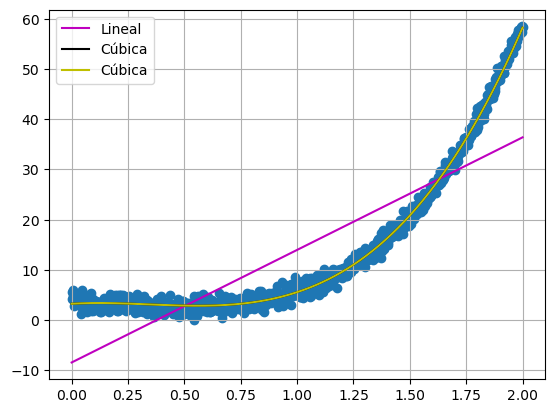

In [117]:
plt.figure()
plt.grid()
plt.scatter(x, y)
plt.plot(x, X @ np.reshape(sol1.x, [2, 1]), "m" ,label="Lineal")
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.plot(x, X5 @ np.reshape(sol5.x, [6, 1]), "y", label="Cúbica")
plt.legend(loc = "best")

**ERRORES**

<BarContainer object of 3 artists>

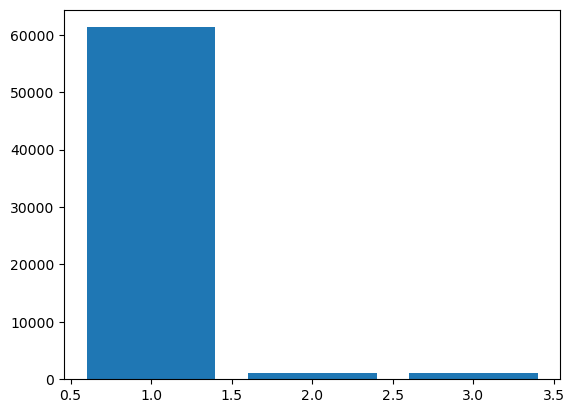

In [118]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol3.fun, sol5.fun])

**¿Qué polinomio se ajusta mejor?**

Debido a que la nube de datos asemeja una parábola, la función cúbica y quinta se  ajustan de igual manera y con el mismo error, por lo que para facilitar los cálculos a la computadora, la función óptima es la cúbica.

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

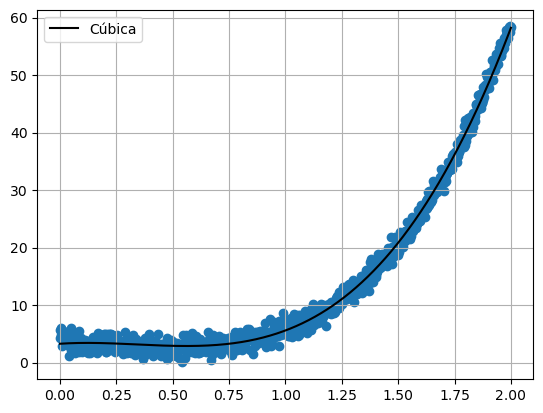

In [119]:
plt.figure()
plt.grid()
plt.scatter(x, y)
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.legend(loc = "best")

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

**Primero definir una función en código que simule la función cúbica obtenida:**

In [120]:
def f(x):
    return 3.264 + 2.592*x - 13.0*x**2 + 12.72*x**3

**Ahora remplazando los valores de $x$ en la función:**

In [121]:
f(0.001)

3.26657901272

In [122]:
f(-0.1)

2.86208

In [123]:
f(2.1)

69.17712000000002

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

En la extrapolación ($x=2.1$), efectivamente arroja un valor mas alto, respetanto la curva a la alza.
En la interpolación, también arroja un resultado que se ve en el promedio del los datos para esa zona por lo que se puede concluír que las predicciones estan cerca de los datos reales.

5. Agregue un factor $\cos{(10x)}$ a su modelo y grafique los resultados. ¿Mejoró el resultado?

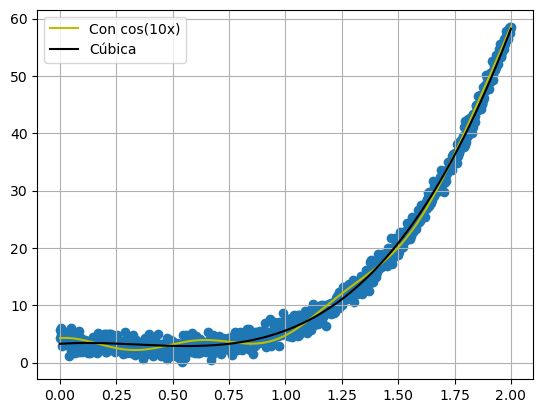

In [136]:
def f(x):
    return 3.264 + 2.592*x - 13.0*x**2 + 12.72*x**3 + np.cos(10*x)

plt.figure()
plt.grid()
plt.scatter(x, y,)
plt.plot(x, f(x), "y", label="Con cos(10x)")
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.legend(loc = "best")

In [50]:
f(0.001)

4.266529013136665

In [51]:
f(-0.1)

3.40238230586814

In [53]:
f(2.1)

68.62939073977574

El resultado es muy parecido, los datos pequeños se vieron un poco afectados debido a las curvas que genera el coseno, sin embargo, los resultados son muy parecidos entre sí.